### Defferential Evolution (eralize rosenbrock)




In [1198]:
import numpy as np
import random
from array import *
import matplotlib.pyplot as plt
import statistics as st
import math 

In [1199]:
D = 10 # Dimensi dari permasalahan
maxit = 99 #Max iterasi
#maxit = 495 #Max iterasi
ukuranPopulasi = 10
LB = -30 #Batas Bawah
UB = 30 #Batas Atas
CR = 0.9 
F = 0.5



In [1200]:
import random
def initPopulasi(ukuranPopulasi, D, UB, LB): #Inisialisasi setiap baris kolom
    P = np.empty((ukuranPopulasi,D))
    for i in range(ukuranPopulasi):
        for j in range(D):
            P[i][j]= (random.random()*(UB-LB))+LB
    return P

P = initPopulasi(ukuranPopulasi, D, UB, LB)
print(P)

[[ -4.31989349  -6.02052172 -29.5944793  -16.05092933  17.32842641
   27.09911361  19.61629467  15.80666967  -1.44566903 -15.57844307]
 [-19.66339459  21.15936886  15.88259604 -15.84049668 -11.50072269
   -6.32702278  25.97403914  -7.66430191  20.79945561   5.19040482]
 [ -4.4608596  -24.99790406  27.86278004  12.16987262 -22.31485918
    9.62225434  20.0708507  -11.07587077  20.36860179  -9.18549819]
 [-26.09522786  16.28695527  -1.27574002  16.70712843 -28.08497075
  -28.99156568  12.68388522   4.38982582  19.16753501   7.94150965]
 [ 26.14859167 -11.94087323  27.51315127   3.42793625 -25.35915512
   21.43179972  14.28349115   3.73670237  14.40532017 -19.34638537]
 [ -2.05596653  -6.35502848  12.41003877 -23.75985261  22.009279
   -7.22870203  15.48147474 -13.0578926   -0.1819396   -6.7545737 ]
 [ -6.6042105    3.03539158  -1.25727846   2.68786527 -10.90488097
  -25.6389763    6.11014714  16.92081144  -0.94923841  -8.1950749 ]
 [ 19.13849986 -11.07323146  27.64585637  -7.27243905  19

In [1201]:
def Fitness_Func(populasi):
    ukuran = populasi.shape
    ukuranPopulasi = ukuran[0]
    dimensi = ukuran[1]
    
    Fobj = np.empty(ukuranPopulasi)
    
    for i in range (ukuranPopulasi):
        d = 0
        for j in range (dimensi):
            #d = d + populasi[i][j]**2
            #d = d + np.sum(np.abs(populasi[i][j])) + np.product(np.abs(populasi[i][j])) #schwefel 2.22
            d = d + np.sum(100*(populasi[i][j]+1)-(populasi[i][j]))**2 + (populasi[i][j]-1)**2 #Generalize rosenbrock
            # d =  d + np.sum( (populasi[i][j]**2) - (10*math.cos(2*math.pi*populasi[i][j])) + 10 ) #rastrigins
        Fobj[i] = d
    return Fobj
    
Fobj = Fitness_Func(P)
print(Fobj)



[30645533.79752161 27147336.29914287 31672437.71651385 33938339.16500393
 35455031.36859612 17121019.4301655  11661807.45655456 44141965.41514488
 32530557.45484405 24119803.95882684]


In [1202]:
def crossOver(populasi,F,j):
    ukuran = populasi.shape
    ukuranPopulasi = ukuran[0]
    Dimensi = ukuran[1]
    
    r1 = random.randint(0, ukuranPopulasi-1)
    r2 = random.randint(0, ukuranPopulasi-1)
    r3 = random.randint(0, ukuranPopulasi-1)
    
    while r1 == r2:
        r2 = (r2 + 1)%ukuranPopulasi
        
    while r3 == r1 or r3 == r2:
        r3 = (r3 + 1)%ukuranPopulasi
        
    v = P[r3][j] + F*(P[r1][j] - P[r2][j])
    return v

v = crossOver(P,F,1)
print(v)

-18.66911261762329


In [1203]:
P = initPopulasi(ukuranPopulasi, D, UB, LB)
print("Inisialisasi Populasi :\n",P)
print(P)

Fobj = Fitness_Func(P)
print(Fobj)
print("\nFungsi Objective :\n",Fobj)

U = np.empty((1,D))
bestFobj = np.empty((maxit+1))
bestFobj[0] = Fobj.min()

for it in range(maxit):
    for i in range(ukuranPopulasi):
        for j in range(D):
            U[0][j] = P[i][j]

        jrand=random.randint(0,D)
        
        for j in range(D):
            if random.random() < CR or j == jrand:
                v = crossOver(P,F,j)
                U[0][j] = v
                
        FobjU = Fitness_Func(U)
        
        if FobjU < Fobj[i]:
            Fobj[i] = FobjU
            for j in range(D):
                P[i][j] = U[0][j]
                
    bestFobj[it+1] = Fobj.min()

    print("\nNilai Optimal : \n",bestFobj)

    for i in range(30):
        bestFobj

Inisialisasi Populasi :
 [[ 2.76538672e+01 -2.41834931e+00 -2.07668918e+01  2.55738482e+01
  -1.97898906e+01  1.29980616e+01 -1.15494851e+01 -1.28038952e+01
  -2.21968268e+01 -1.23471296e+01]
 [-2.37316795e+01 -1.32519009e+01  1.32451957e+01  2.60949485e+00
  -2.11674218e+01 -2.84559232e+01 -2.11370052e+01 -6.51475397e+00
   2.47609704e+01  2.30640972e+01]
 [-9.81943352e+00  1.44826017e+01 -6.98666575e+00  9.69643278e-01
  -5.65126867e+00 -4.35295278e-01  3.50701233e+00  4.47610438e+00
   1.97174421e+01 -2.56733030e+01]
 [-5.41109074e+00  1.98407165e+01  1.93486889e+01  2.43605721e+01
   2.53719421e+01  7.96486211e+00  1.37399935e+01 -1.01555999e+01
   2.25483196e+01  1.30189202e+01]
 [-1.50228557e+01 -2.16656642e+01  5.34191993e+00 -2.10786936e+01
   1.14136360e-02 -1.82487205e+01  5.01486390e+00 -2.75323322e+01
   7.78635199e+00 -9.14879299e+00]
 [ 1.20167600e+00  2.97671086e+01 -1.89998739e+01  1.74630847e+01
  -2.27596325e+01  2.70254223e+01  1.67691892e+01  2.66150128e+01
  -1.299

In [1204]:
import statistics as st
print("Nilai Mean : ",st.mean(bestFobj))
print("Nilai Standard Deviation : ",st.stdev(bestFobj))
print("Nilai Minimal : ",np.min(bestFobj))

Nilai Mean :  2661784.5095996186
Nilai Standard Deviation :  4672830.927810584
Nilai Minimal :  1994.4194605694136


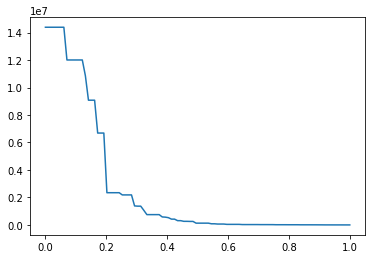

In [1205]:
x = np.linspace(0, 1, maxit+1)
plt.plot(x, bestFobj, label= 'f=Fobj')
plt.show()

### Genetic Algorithm

In [1206]:
import numpy as np
import random
from array import *
import matplotlib.pyplot as plt
import statistics as st
import math 

In [1207]:
N = 3
rows, cols = (N, 4)
induk = [[0 for i in range(cols)] for j in range(rows)]
print (induk)

N_Anak = 6
rows, cols = (N_Anak, 4)
anak = [[0 for i in range(cols)] for j in range(rows)]
print(anak)


[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]


In [1208]:
#Inisialiasi Parameter
Pc = 0.9
Pm = 0.1

for i in range(N):
    a = random.randint(0, 15)
    induk[i] = [int (x) for x in '{:04b}'.format(a)]
    print(a, induk[i])


7 [0, 1, 1, 1]
7 [0, 1, 1, 1]
8 [1, 0, 0, 0]


In [1209]:
#Function cross over
def crossover(ind1=[], ind2=[]):
    anak1 = [0, 0, 0, 0]
    anak2 = [0, 0, 0, 0]
    
    
    anak1[0] = ind1[0]
    anak1[1] = ind1[1]
    anak1[2] = ind2[2]
    anak1[3] = ind2[3]
    
    anak2[0] = ind2[0]
    anak2[1] = ind2[1]
    anak2[2] = ind1[2]
    anak2[3] = ind1[3]
    
    return anak1, anak2


In [1210]:
#Function  mutasi
def mutasi(ind=[]):
    ind[1] = 1 - ind[1]
    return ind


In [1211]:
#Function hitung Int
def hitungInt(ind = []):
    a = ind[3] * 1
    a = a + ind[2] * 2
    a = a + ind[1] * 4
    a = a + ind[0] * 8
    return a


In [1212]:
#Buat function untuk melakukan hitung fitness
def hitungFitness(ind = []):
    a = hitungInt(ind)
    #y = a**2 #sphere
    #y = np.sum(np.abs(a)) + np.product(np.abs(a)) #schwefel 2.22
    y = np.sum(100*(a+1)-(a))**2 + (a-1)**2 #Generalize rosenbrock
    # y = np.sum( (a**2) - (10*math.cos(2*math.pi*a)) + 10 ) #rastrigins

    return y

In [1213]:
i = 1
#epochs = 495
epochs = 99
MaxFitness = [0 for i in range(epochs)] 
angkaFitness = [0 for i in range(epochs)]

#nilai fitness induk
for j in range(N):
    if (hitungFitness(induk[j])>MaxFitness[0]):
        MaxFitness[0] = hitungFitness(induk[j])


In [1214]:
#'epochs' kali
for i in range(30):
  while i < epochs:
    print("Iterasi: ", i+1)   
    #Reproduksi 
    a = random.random()
    if (a<Pc):
        #Cross over
        anak[0], anak[1] = crossover(induk[0], induk[1])
        anak[2], anak[3] = crossover(induk[0], induk[2])
        anak[4], anak[5] = crossover(induk[1], induk[2])
    else:
        #Mutasi
        for j in range(N):
            induk [j] = mutasi(induk[j])
    #Elistism
    minFitness = 30
    idx = 0
    idxanak = 0
    #minFitness (induk terburuk)
    for j in range(len(induk)):
        if (hitungFitness(induk[j])<minFitness):
            minFitness = hitungFitness(induk[j])
            idx = j
    
    #cari maxFit (Anak terbaik)
    maxFit = -30
    for j in range(len(anak)):
        if (hitungFitness(anak[j])>maxFit):
            maxFit = hitungFitness(anak[j])
            idxanak = j
    #Individual replacement
    if (minFitness < maxFit):
        induk[idx] = anak[idxanak]
    
    #Populasi induk yang paling baik
    for j in range(N):
        if (hitungFitness(induk[j])>MaxFitness[i]):
            MaxFitness[i] = hitungFitness(induk[j])
    i+=1
    
    print(MaxFitness)

Streaming output truncated to the last 5000 lines.
Iterasi:  36
[1413821, 1413821, 1413821, 1413821, 1413821, 1413821, 1413821, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 1659065, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Iterasi:  37
[1413821, 1413821, 1413821, 1413821, 1413821, 1413821, 1413821, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 1659065, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 2512421, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [1215]:
print("Nilai Mean : ", st.mean(MaxFitness))
print("Nilai Standard Deviation : ", st.stdev(MaxFitness))
print("Nilai Minimal : ",np.min(MaxFitness))

Nilai Mean :  2501324
Nilai Standard Deviation :  110413.45438396536
Nilai Minimal :  1413821


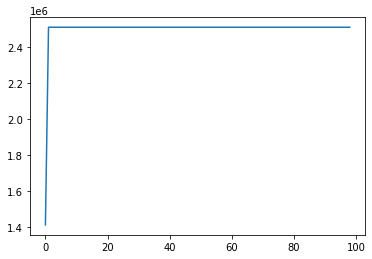

In [1216]:
x = [i for i in range(epochs)] 
plt.plot(x, MaxFitness)  